# Carry Tables

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
from itertools import product
import random
import math
import pickle
from tqdm.notebook import tqdm_notebook
import sys
sys.path.append('../')
import utils

/Users/cutterdawes/Desktop/Princeton/Thesis/Repo/stats/../utils.py:8: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [2]:
%load_ext autoreload
%autoreload 2

## Display Carry Tables

In [3]:
b=4 #modulus

basic_table=1*(np.add.outer(np.arange(b),np.arange(b))>=b)
alt_table=np.array([[0,0,0,0],
                    [0,3,3,3],
                    [0,3,3,0],
                    [0,3,0,0]])

### Basic Table, depth $\in [1:3]$

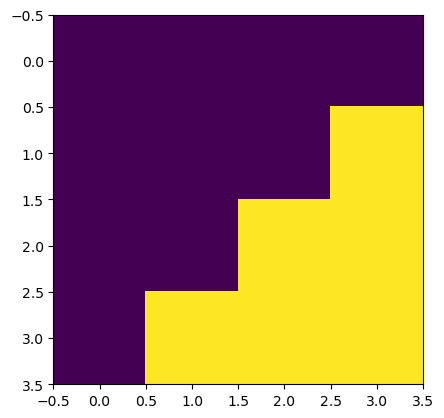

In [4]:
plt.imshow(utils.construct_product_table(basic_table, 1))

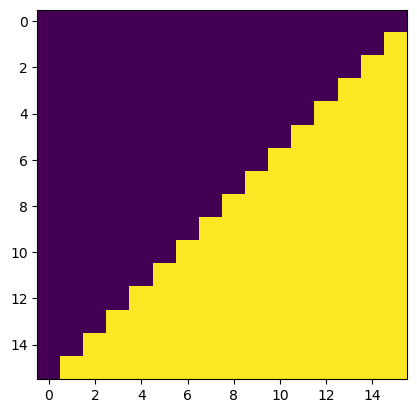

In [5]:
plt.imshow(utils.construct_product_table(basic_table, 2))

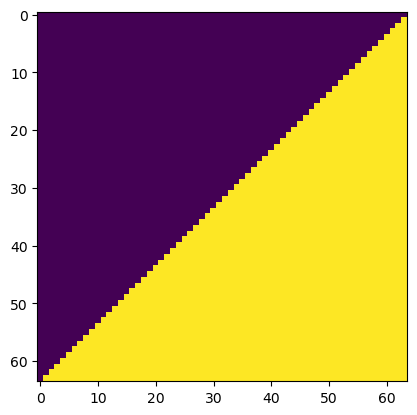

In [6]:
plt.imshow(utils.construct_product_table(basic_table, 3))

### Alternative Table, depth $\in [1:4]$

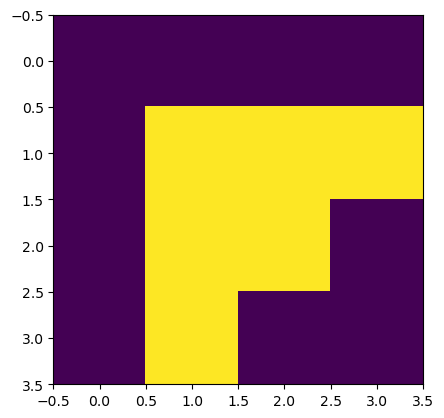

In [7]:
plt.imshow(utils.construct_product_table(alt_table, 1))

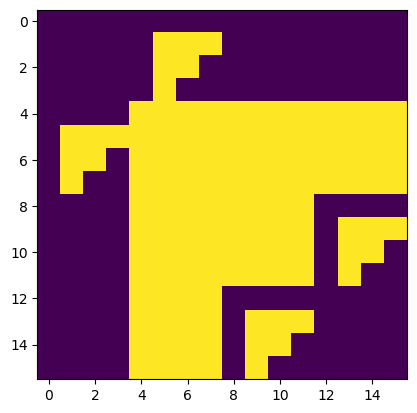

In [8]:
plt.imshow(utils.construct_product_table(alt_table, 2))

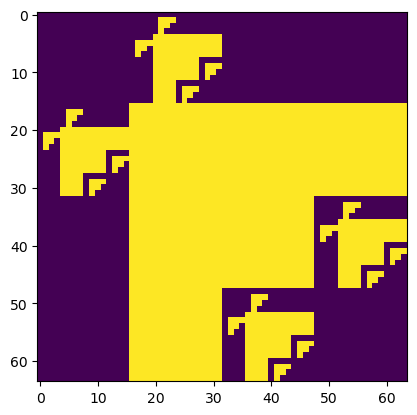

In [9]:
plt.imshow(utils.construct_product_table(alt_table, 3))

## Compare Carry Tables

### Find alternative cocycles

### Plot carry tables

In [3]:
with open('../pickles/carry_tables/all_tables_d1_b2-6.pickle', 'rb') as f:
    all_tables = pickle.load(f)

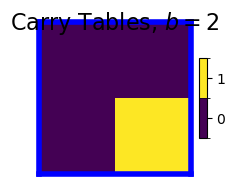

In [11]:
utils.show_tables(all_tables[2], 2, depth=1)

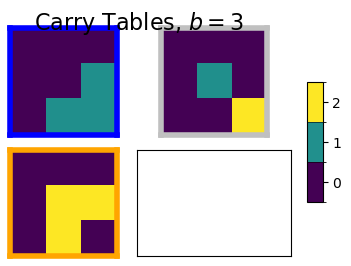

In [12]:
utils.show_tables(all_tables[3], 3, depth=1)

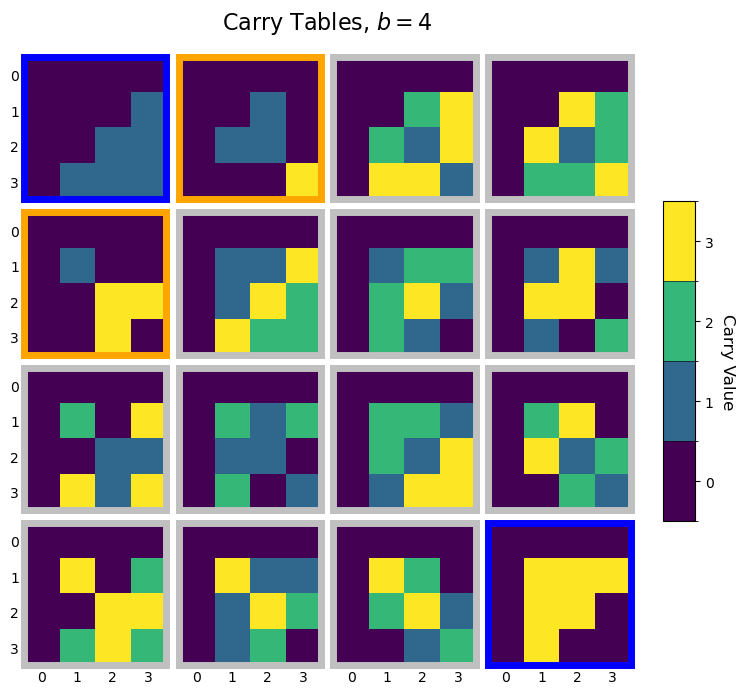

In [11]:
utils.show_tables(all_tables[4], 4, depth=1, savefig=True)

In [40]:
table = all_tables[4][((0, 0, 0, 0), (0, 0, 3, 1), (0, 3, 0, 1), (0, 1, 1, 2))]

In [14]:
from itertools import combinations

In [15]:
from base import BaseElt

In [46]:
n = BaseElt((0, 0, 1), table)
m = BaseElt((0, 0, 2), table)
p = BaseElt((0, 0, 3), table)

In [47]:
s1 = (n + m) + p
s2 = n + (m + p)

In [48]:
print(s1.vals, s2.vals)

(3, 2, 2) (0, 2, 2)


In [16]:
associativity_vs_depth[4][((0, 0, 0, 0), (0, 0, 3, 1), (0, 3, 0, 1), (0, 1, 1, 2))]

NameError: name 'associativity_vs_depth' is not defined

In [ ]:
utils.show_tables(all_tables[5], 5, depth=1)

In [ ]:
utils.show_tables(all_tables[6], 6, depth=1)

In [ ]:
utils.show_tables(all_tables[7], 7, depth=1)

In [ ]:
utils.show_tables(all_tables[8], 8, depth=1)

In [ ]:
utils.show_tables(all_tables[9], 9, depth=1)

### Compute fraction of zeros, number of unique digits, and estimated box-counting dimension for each table

In [101]:
with open('../pickles/carry_tables/all_tables_d1_b2-6.pickle', 'rb') as f:
    all_tables = pickle.load(f)

In [105]:
del all_tables[6]

In [113]:
# initialize dictionaries
frac_zeros_vs_depth = {b: {c: [] for c in all_tables[b].keys()} for b in range(3, 6)}
num_digits_vs_depth = {b: {c: [] for c in all_tables[b].keys()} for b in range(3, 6)}
est_dim_box_vs_depth = {b: {c: [] for c in all_tables[b].keys()} for b in range(3, 6)}

# iterate through bases and c's
for b in tqdm_notebook(range(3, 6)):
    for c in all_tables[b].keys():
        for depth in range(1, 5):
            table = utils.construct_product_table(all_tables[b][c], depth=depth)
            frac_zeros = (table.size - np.count_nonzero(table)) / table.size
            frac_zeros_vs_depth[b][c].append(frac_zeros)
            num_digits = len(np.unique(table))
            num_digits_vs_depth[b][c].append(num_digits)
            est_dim = utils.get_dim(table)
            est_dim_box_vs_depth[b][c].append(est_dim)

  0%|          | 0/3 [00:00<?, ?it/s]

In [115]:
est_dim_box_vs_depth[3]

{((0, 0, 0), (0, 0, 0), (0, 0, 0)): [1.0,
  1.6309297535714573,
  1.7782391731575975,
  1.8394406953580749],
 ((0, 0, 0), (0, 2, 1), (0, 1, 2)): [1.0,
  1.6309297535714573,
  1.7782391731575975,
  1.8394406953580749],
 ((0, 0, 0), (0, 1, 2), (0, 2, 1)): [0.6309297535714574,
  1.3634165139304208,
  1.5789636740685573,
  1.6845004368630634]}

In [ ]:
with open('../pickles/frac_zeros_vs_depth.pickle', 'rb') as f:
    frac_zeros_vs_depth = pickle.load(f)

In [ ]:
with open('../pickles/num_digits_vs_depth.pickle', 'rb') as f:
    num_digits_vs_depth = pickle.load(f)

In [266]:
with open('../pickles/est_dim_box_vs_depth.pickle', 'rb') as f:
    est_dim_box_vs_depth = pickle.load(f)

### Plot fraction of zeros, number of unique digits, and estimated box-counting dimension

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8), sharey=True)
axes = axes.flatten()
for i in range(len(axes) - 1):
    ax = axes[i]
    tables = all_tables[i+3]
    for c in tables.keys():
        ax.plot(frac_zeros_vs_depth[i+3][c], alpha=0.5, marker='o', linestyle='--', label=sorted(c)[0])
        ax.set_xticks([0, 1, 2, 3], [1, 2, 3, 4])
        ax.set_xlabel('depth')
        ax.set_yticks(np.linspace(0, 1, 5))
        if (i == 3) or (i == 7):
            ax.set_ylabel('fraction of zeros')
        ax.set_title('b = '+str(i+3))
        ax.legend(fontsize=7)
axes[7].axis('off')
fig.suptitle('Fraction of Zeros vs. Depth')
plt.tight_layout()

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()
for i in range(len(axes) - 1):
    ax = axes[i]
    tables = all_tables[i+3]
    for c in tables.keys():
        ax.plot(num_digits_vs_depth[i+3][c], alpha=0.5, marker='o', linestyle='--', label=sorted(c)[0])
        ax.set_xticks([0, 1, 2, 3], [1, 2, 3, 4])
        ax.set_yticks(range(i+4))
        ax.set_xlabel('depth')
        if (i == 3) or (i == 7):
            ax.set_ylabel('number of digits')
        ax.set_title('b = '+str(i+3))
        ax.legend(fontsize=7)
axes[7].axis('off')
fig.suptitle('Number of Digits vs. Depth')
plt.tight_layout()

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8), sharey=True)
axes = axes.flatten()
for i in range(len(axes) - 1):
    ax = axes[i]
    tables = all_tables[i+3]
    for c in tables.keys():
        ax.plot(est_dim_box_vs_depth[i+3][c], alpha=0.5, marker='o', linestyle='--', label=sorted(c)[0])
        ax.set_xticks([0, 1, 2, 3], [1, 2, 3, 4])
        ax.set_xlabel('depth')
        ax.set_yticks(np.linspace(0, 2, 9))
        if (i == 3) or (i == 7):
            ax.set_ylabel('est. box-counting dim.')
        ax.set_title('b = '+str(i+3))
        ax.legend(fontsize=7)
axes[7].axis('off')
fig.suptitle('Estimated Box-Counting Dimension vs. Depth')
plt.tight_layout()

## Figure showing recursive structure

In [25]:
from matplotlib.colors import BoundaryNorm
import matplotlib.patches as patches

In [28]:
with open('../pickles/complexity_measures/est_dim_box_vs_depth.pickle', 'rb') as f:
    est_dim_box_vs_depth = pickle.load(f)

In [29]:
b = 3
tables = all_tables[b]

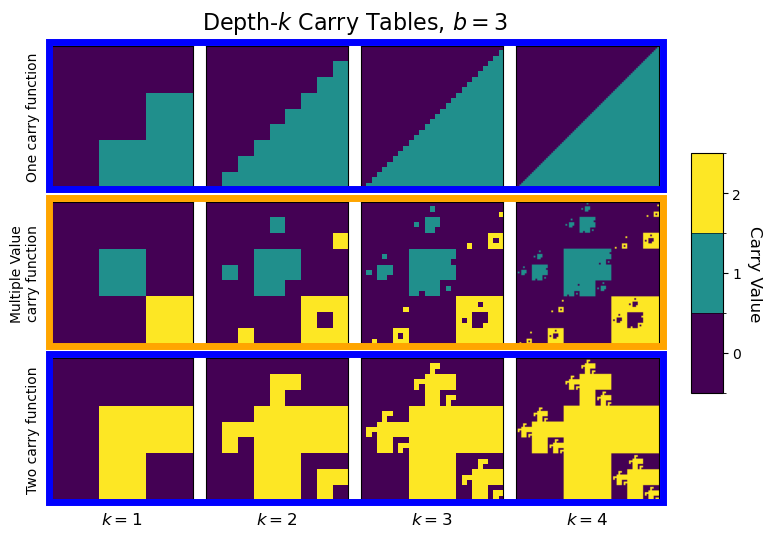

In [32]:
# create fig, axes
fig, axes = plt.subplots(3, 4, figsize=(2*4, 2*3))
fig.suptitle('Depth-$k$ Carry Tables, '+ r'$b =$' + str(b), fontsize=16, y=0.94)

# sort table_dict
tables = {dc: tables[dc] for dc in sorted(tables.keys())}

# iterate through table_dict
i = 0
for dc, table in tables.items():

    # classify as standard, alt. unit, or other carry
    if (np.array(dc) == 0).all():
        carry_type = 'Standard'
        color = 'blue'
    elif len(np.unique(table)) == 2:
        carry_type = 'Alt. Unit'
        color = 'orange'
    else:
        carry_type = 'Other'
        color = 'silver'

    # construct product table
    for j in range(0, 4):
        depth = j + 1
        product_table = utils.construct_product_table(table, depth)

        # display image, increment i
        ax = axes[i, j]
        # if j == 0:
        #     utils.add_border(ax, color=color, width=4)
        levels = np.linspace(-0.5, b-0.5, b+1)
        norm = BoundaryNorm(levels, ncolors=256)
        im = ax.imshow(product_table, cmap='viridis', norm=norm)
        # ax.set_title(carry_type, fontsize=10)
    
    i += 1

# turn off axis ticks and labels
for ax in axes.flatten():
    ax.tick_params(axis='both', which='both', length=0)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# add labels
for j, ax in enumerate(axes[b-1,:]):
    ax.set_xlabel(f'$k={j+1}$', fontsize=12)
axes[0,0].set_ylabel('One carry function')
axes[1,0].set_ylabel('Multiple Value\ncarry function')
axes[2,0].set_ylabel('Two carry function')

# add colorbar
plt.tight_layout()
fig.subplots_adjust(left=0.12, right=0.88, bottom=0.12, top=0.88)
cbar_ax = fig.add_axes([0.92, 0.3, 0.04, 0.4])
cbar = fig.colorbar(im, cax=cbar_ax, boundaries=levels, drawedges=True)
cbar.set_ticks(range(b))
cbar.set_label('Carry Value', fontsize=12, rotation=270, labelpad=15)

# draw rectangles
pad = 0.002
for row_idx in range(3):
    # get all axes in this row
    row_axes = axes[row_idx, :]

    # get their positions in figure coordinates
    positions = [ax.get_position() for ax in row_axes]

    # compute bounding box covering the whole row
    x0 = min(p.x0 for p in positions)
    y0 = min(p.y0 for p in positions)
    x1 = max(p.x1 for p in positions)
    y1 = max(p.y1 for p in positions)
    width = x1 - x0
    height = y1 - y0

    # add padding
    x0 -= pad
    y0 -= pad
    width += 4 * pad
    height += 4 * pad

    # determine color based on carry type (same logic as before)
    dc = list(tables.keys())[row_idx]
    table = tables[dc]
    est_dim = est_dim_box_vs_depth[b][dc][3]
    if len(np.unique(all_tables[b][dc])) == 2:
        color = 'blue'
    elif est_dim > 1.25 and est_dim < 1.5:
        color = 'orange'
    else:
        color = 'silver'

    # draw rectangle around the row
    rect = patches.Rectangle(
        (x0, y0),
        width,
        height,
        edgecolor=color,
        facecolor='none',
        linewidth=5,
        transform=fig.transFigure,
        zorder=10
    )
    fig.patches.append(rect)

plt.savefig(f'../figures/tables{b}_recursion.png', dpi=300, bbox_inches='tight')

## Plot Frequency of Carrying

In [34]:
with open('../pickles/complexity_measures/frac_zeros_vs_depth.pickle', 'rb') as f:
    frac_zeros_vs_depth = pickle.load(f)

In [35]:
with open('../pickles/complexity_measures/est_dim_box_vs_depth.pickle', 'rb') as f:
    est_dim_box_vs_depth = pickle.load(f)

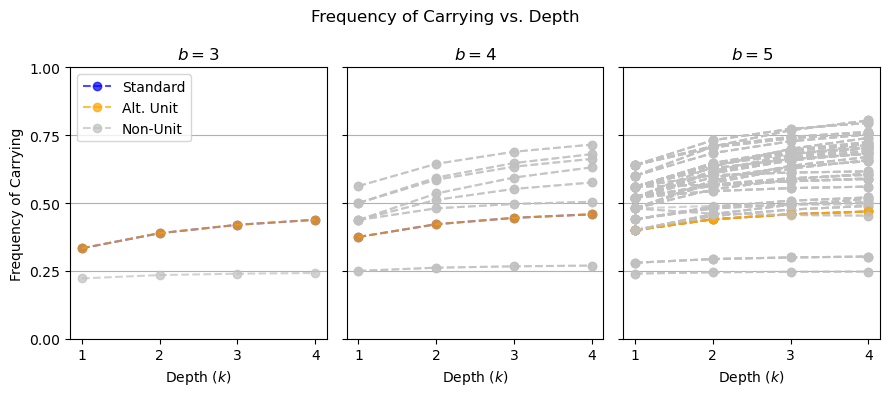

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(9, 4), sharey=True)
for i in range(len(axes)):
    ax = axes[i]
    b = i+3
    tables = all_tables[b]
    for dc in tables.keys():
        dim = est_dim_box_vs_depth[b][dc][3]
        carry_freq = 1 - np.cumsum(np.array(frac_zeros_vs_depth[b][dc])) / np.arange(1, 5)
        if (np.array(dc) == 0).all():
            std, = ax.plot(carry_freq, color='blue', alpha=0.7, marker='o', linestyle='--', label='Standard')
        elif len(np.unique(tables[dc])) == 2:
            alt_unit, = ax.plot(carry_freq, color='orange', alpha=0.7, marker='o', linestyle='--', label='Alt. Unit')
        else:
            non_unit, = ax.plot(carry_freq, color='silver', alpha=0.7, marker='o', linestyle='--', label='Non-Unit')
    ax.set_xticks([0, 1, 2, 3], [1, 2, 3, 4])
    ax.set_xlabel('Depth ($k$)')
    ax.set_yticks(np.linspace(0, 1, 5))
    ax.grid(axis='y')
    if (i == 0):
        ax.set_ylabel('Frequency of Carrying')
        ax.legend(handles=[std, alt_unit, non_unit], loc='upper left')
    ax.set_title(f'$b = {b}$')
fig.suptitle('Frequency of Carrying vs. Depth')
plt.tight_layout()
# plt.savefig('../figures/carry_freq.png', dpi=300)

## Plot Number of Unique Carries

In [36]:
with open('../pickles/complexity_measures/num_digits_vs_depth.pickle', 'rb') as f:
    num_digits_vs_depth = pickle.load(f)

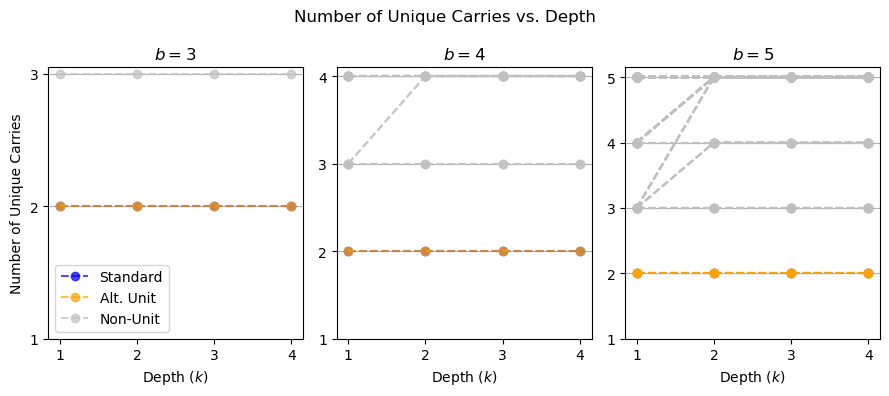

In [172]:
fig, axes = plt.subplots(1, 3, figsize=(9, 4))
for i in range(len(axes)):
    ax = axes[i]
    b = i+3
    tables = all_tables[b]
    for dc in tables.keys():
        num_digits = num_digits_vs_depth[b][dc]
        if (np.array(dc) == 0).all():
            std, = ax.plot(num_digits, color='blue', alpha=0.7, marker='o', linestyle='--', label='Standard')
        elif len(np.unique(tables[dc])) == 2:
            alt_unit, = ax.plot(num_digits, color='orange', alpha=0.7, marker='o', linestyle='--', label='Alt. Unit')
        else:
            non_unit, = ax.plot(num_digits, color='silver', alpha=0.7, marker='o', linestyle='--', label='Non-Unit')
    ax.set_xticks([0, 1, 2, 3], [1, 2, 3, 4])
    ax.set_xlabel('Depth ($k$)')
    ax.set_yticks(np.arange(1, b+1))
    ax.grid(axis='y')
    if (i == 0):
        ax.set_ylabel('Number of Unique Carries')
        ax.legend(handles=[std, alt_unit, non_unit], loc='lower left')
    ax.set_title(f'$b = {b}$')
fig.suptitle('Number of Unique Carries vs. Depth')
plt.tight_layout()
plt.savefig('../figures/num_carries.png', dpi=300)

## Plot Estimated Fractal Dimension

In [37]:
with open('../pickles/complexity_measures/est_dim_box_vs_depth.pickle', 'rb') as f:
    est_dim_box_vs_depth = pickle.load(f)

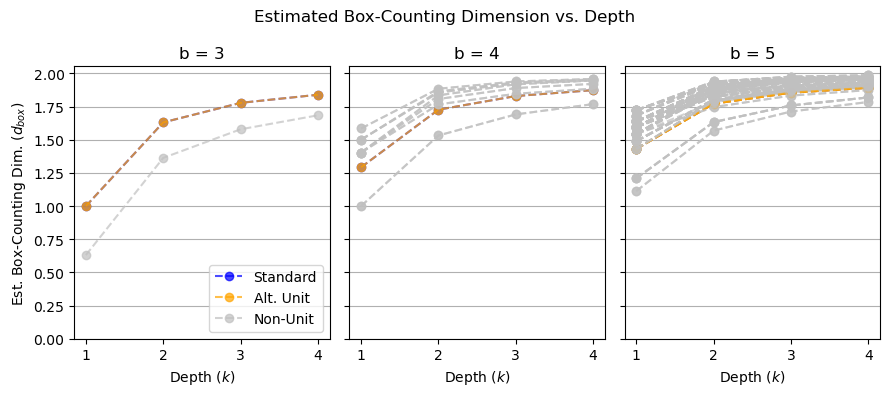

In [120]:
fig, axes = plt.subplots(1, 3, figsize=(9, 4), sharey=True)
for i in range(len(axes)):
    ax = axes[i]
    tables = all_tables[i+3]
    for dc in tables.keys():
        if (np.array(dc) == 0).all():
            std, = ax.plot(est_dim_box_vs_depth[i+3][dc], color='blue', alpha=0.7, marker='o', linestyle='--', label='Standard')
        elif len(np.unique(tables[dc])) == 2:
            alt_unit, = ax.plot(est_dim_box_vs_depth[i+3][dc], color='orange', alpha=0.7, marker='o', linestyle='--', label='Alt. Unit')
        else:
            non_unit, = ax.plot(est_dim_box_vs_depth[i+3][dc], color='silver', alpha=0.7, marker='o', linestyle='--', label='Non-Unit')
    ax.set_xticks([0, 1, 2, 3], [1, 2, 3, 4])
    ax.set_xlabel('Depth ($k$)')
    ax.set_yticks(np.linspace(0, 2, 9))
    ax.grid(axis='y')
    if (i == 0):
        ax.set_ylabel('Est. Box-Counting Dim. ($d_{box}$)')
        ax.legend(handles=[std, alt_unit, non_unit], loc='lower right')
    ax.set_title('b = '+str(i+3))
fig.suptitle('Estimated Box-Counting Dimension vs. Depth')
plt.tight_layout()
# plt.savefig('../figures/dim_box.png', dpi=300)

## Plot Associativity Fraction

In [38]:
with open('../pickles/complexity_measures/associativity_vs_depth_d6.pickle', 'rb') as f:
    associativity_vs_depth = pickle.load(f)

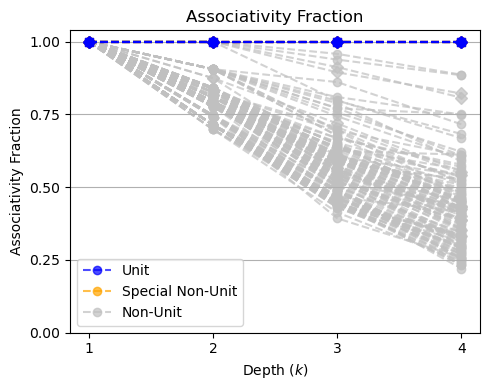

In [96]:
fig = plt.figure(figsize=(5, 4))
markers = {3: 's', 4: 'D', 5: 'o'}

for b in range(3, 6):
    tables = all_tables[b]
    for dc in tables.keys():
        dim = est_dim_box_vs_depth[b][dc][3]
        assoc_vs_depth = associativity_vs_depth[b][dc][:4]
        if len(np.unique(tables[dc])) == 2:
            unit, = plt.plot(assoc_vs_depth, color='blue', alpha=0.7, marker=markers[b], linestyle='--', label='Unit', zorder=3)
        elif dim > 1.25 and dim < 1.5:
            special_non_unit, = plt.plot(assoc_vs_depth, color='orange', alpha=0.7, marker=markers[b], linestyle='--', label='Special Non-Unit', zorder=2)
        else:
            non_unit, = plt.plot(assoc_vs_depth, color='silver', alpha=0.7, marker=markers[b], linestyle='--', label='Non-Unit', zorder=1)
plt.xticks([0, 1, 2, 3], [1, 2, 3, 4])
plt.xlabel('Depth ($k$)')
plt.yticks(np.linspace(0, 1, 5))
plt.ylabel('Associativity Fraction')
plt.grid(axis='y')
plt.legend(handles=[unit, special_non_unit, non_unit], loc='lower left')
plt.title('Associativity Fraction')

plt.tight_layout()
# plt.savefig('../figures/associativity.png', dpi=300)

## Combine the Complexity Figures

In [15]:
with open('../pickles/carry_tables/all_tables_d1_b2-6.pickle', 'rb') as f:
    all_tables = pickle.load(f)

In [16]:
with open('../pickles/complexity_measures/est_dim_box_vs_depth.pickle', 'rb') as f:
    est_dim_box_vs_depth = pickle.load(f)

In [17]:
with open('../pickles/complexity_measures/frac_zeros_vs_depth.pickle', 'rb') as f:
    frac_zeros_vs_depth = pickle.load(f)

In [18]:
with open('../pickles/complexity_measures/associativity_vs_depth_d6.pickle', 'rb') as f:
# with open('../pickles/complexity_measures/associativity_vs_depth_d5_s1000.pickle', 'rb') as f:
    associativity_vs_depth = pickle.load(f)

In [19]:
from matplotlib.lines import Line2D

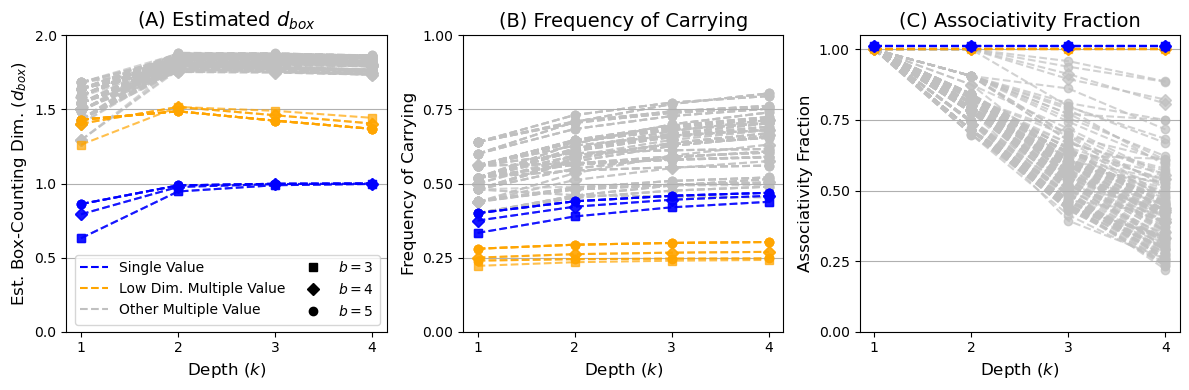

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
markers = {3: 's', 4: 'D', 5: 'o'}

# est dims subfig
for b in range(3, 6):
    tables = all_tables[b]
    for dc in tables.keys():
        dims = est_dim_box_vs_depth[b][dc]
        est_dim = dims[3]
        if len(np.unique(tables[dc])) == 2:
            unit, = axes[0].plot(dims, color='blue', alpha=0.7, marker=markers[b], linestyle='--', label='Single Value', zorder=3)
        elif est_dim > 1.25 and est_dim < 1.5:
            special_non_unit, = axes[0].plot(dims, color='orange', alpha=0.7, marker=markers[b], linestyle='--', label='Low Dim. Multiple Value', zorder=2)
        else:
            non_unit, = axes[0].plot(dims, color='silver', alpha=0.7, marker=markers[b], linestyle='--', label='Other Multiple Value', zorder=1)
    axes[0].set_xticks([0, 1, 2, 3], [1, 2, 3, 4])
    axes[0].set_xlabel('Depth ($k$)', fontsize=12)
    axes[0].set_yticks(np.linspace(0, 2, 5))
    label = axes[0].set_ylabel('Est. Box-Counting Dim. ($d_{box}$)', fontsize=12)
    axes[0].grid(axis='y')
axes[0].set_title(r'(A) Estimated $d_{box}$', fontsize=14)

# plot legend
marker_legend_elements = [
    Line2D([0], [0], marker='s', color='black', linestyle='None', label=r'$b=3$'),
    Line2D([0], [0], marker='D', color='black', linestyle='None', label=r'$b=4$'),
    Line2D([0], [0], marker='o', color='black', linestyle='None', label=r'$b=5$')
]
curve_legend_elements = [
    Line2D([0], [0], color='blue', linestyle='--', marker=None, label='Single Value'),
    Line2D([0], [0], color='orange', linestyle='--', marker=None, label='Low Dim. Multiple Value'),
    Line2D([0], [0], color='silver', linestyle='--', marker=None, label='Other Multiple Value')
]
all_legend_elements = curve_legend_elements + marker_legend_elements
axes[0].legend(handles=all_legend_elements, loc='lower right', ncol=2, columnspacing=1)

# carry freq subfig
for b in range(3, 6):
    tables = all_tables[b]
    for dc in tables.keys():
        dim = est_dim_box_vs_depth[b][dc][3]
        carry_freq = 1 - np.cumsum(np.array(frac_zeros_vs_depth[b][dc])) / np.arange(1, 5)
        if len(np.unique(tables[dc])) == 2:
            unit, = axes[1].plot(carry_freq, color='blue', alpha=0.7, marker=markers[b], linestyle='--', label='Single Value', zorder=3)
        elif dim > 1.25 and dim < 1.5:
            special_non_unit, = axes[1].plot(carry_freq, color='orange', alpha=0.7, marker=markers[b], linestyle='--', label='Low Dim. Multiple Value', zorder=2)
        else:
            non_unit, = axes[1].plot(carry_freq, color='silver', alpha=0.7, marker=markers[b], linestyle='--', label='Other Multiple Value', zorder=1)
axes[1].set_xticks([0, 1, 2, 3], [1, 2, 3, 4])
axes[1].set_xlabel('Depth ($k$)', fontsize=12)
axes[1].set_yticks(np.linspace(0, 1, 5))
axes[1].set_ylabel('Frequency of Carrying', fontsize=12)
axes[1].grid(axis='y')
# axes[1].set_legend(handles=[unit, special_non_unit, non_unit], loc='upper left')
axes[1].set_title('(B) Frequency of Carrying', fontsize=14)
plt.tight_layout()

# associativity fraction subfig
for b in range(3, 6):
    tables = all_tables[b]
    for dc in tables.keys():
        dim = est_dim_box_vs_depth[b][dc][3]
        assoc_vs_depth = associativity_vs_depth[b][dc][:4]
        if len(np.unique(tables[dc])) == 2:
            unit, = axes[2].plot(np.array(assoc_vs_depth)+0.01, color='blue', alpha=0.7, marker=markers[b], linestyle='--', label='Single Value', zorder=3)
        elif dim > 1.25 and dim < 1.5:
            special_non_unit, = axes[2].plot(assoc_vs_depth, color='orange', alpha=0.7, marker=markers[b], linestyle='--', label='Low Dim. Multiple Value', zorder=2)
        else:
            non_unit, = axes[2].plot(assoc_vs_depth, color='silver', alpha=0.7, marker=markers[b], linestyle='--', label='Other Multiple Value', zorder=1)
axes[2].set_xticks([0, 1, 2, 3], [1, 2, 3, 4])
axes[2].set_xlabel('Depth ($k$)', fontsize=12)
axes[2].set_yticks(np.linspace(0, 1, 5))
axes[2].set_ylabel('Associativity Fraction', fontsize=12)
axes[2].grid(axis='y')
# axes[2].legend(handles=[unit, special_non_unit, non_unit], loc='lower left')
axes[2].set_title('(C) Associativity Fraction', fontsize=14)

# fig.suptitle('Complexity Measures vs. Depth')
plt.tight_layout()
# plt.savefig('../figures/complexity_measures.png', dpi=300)

## Plot Associativity Fraction

In [33]:
associativity_d1[3]

{((0, 0, 0), (0, 0, 0), (0, 0, 0)): 1.0,
 ((0, 0, 0), (0, 2, 1), (0, 1, 2)): 1.0,
 ((0, 0, 0), (0, 1, 2), (0, 2, 1)): 1.0}

In [42]:
associativity = {3: {dc:[] for dc in all_tables[3].keys()},
                 4: {dc:[] for dc in all_tables[4].keys()},
                 5: {dc:[] for dc in all_tables[5].keys()}}

In [52]:
associativity[3][((0, 0, 0), (0, 0, 0), (0, 0, 0))]

[]

In [53]:
for b in range(3, 6):
    for depth in range(1, 5):
        with open(f'../pickles/complexity_measures/associativity_d{depth}.pickle', 'rb') as f:
            associativity_d = pickle.load(f)
        for dc, frac_assoc in associativity_d.items():
            try:
                frac_assocs = associativity[b][dc]
            except:
                print(b, dc)
            frac_assocs.append(associativity_d[b][dc])
            associativity[b][dc] = frac_assocs

3 3


NameError: name 'frac_assocs' is not defined

In [39]:
associativity[3]

{((0, 0, 0), (0, 0, 0), (0, 0, 0)): 1.0,
 ((0, 0, 0), (0, 2, 1), (0, 1, 2)): 1.0,
 ((0, 0, 0), (0, 1, 2), (0, 2, 1)): 1.0}

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(9, 4), sharey=True)
for i in range(len(axes)):
    ax = axes[i]
    tables = all_tables[i+3]
    for dc in tables.keys():
        if (np.array(dc) == 0).all():
            std, = ax.plot(est_dim_box_vs_depth[i+3][dc], color='blue', alpha=0.7, marker='o', linestyle='--', label='Standard')
        elif len(np.unique(tables[dc])) == 2:
            alt_unit, = ax.plot(est_dim_box_vs_depth[i+3][dc], color='orange', alpha=0.7, marker='o', linestyle='--', label='Alt. Unit')
        else:
            non_unit, = ax.plot(est_dim_box_vs_depth[i+3][dc], color='silver', alpha=0.7, marker='o', linestyle='--', label='Non-Unit')
    ax.set_xticks([0, 1, 2, 3], [1, 2, 3, 4])
    ax.set_xlabel('Depth ($k$)')
    ax.set_yticks(np.linspace(0, 2, 9))
    ax.grid(axis='y')
    if (i == 0):
        ax.set_ylabel('Est. Box-Counting Dim. ($d_{box}$)')
        ax.legend(handles=[std, alt_unit, non_unit], loc='lower right')
    ax.set_title('b = '+str(i+3))
fig.suptitle('Estimated Box-Counting Dimension vs. Depth')
plt.tight_layout()
plt.savefig('../figures/associativity.png', dpi=300)

## Figure for all carry tables in base 5

In [18]:
b = 5

In [19]:
from matplotlib.colors import BoundaryNorm
import matplotlib.patches as patches

In [20]:
with open('../pickles/complexity_measures/est_dim_box_vs_depth.pickle', 'rb') as f:
    est_dim_box_vs_depth = pickle.load(f)

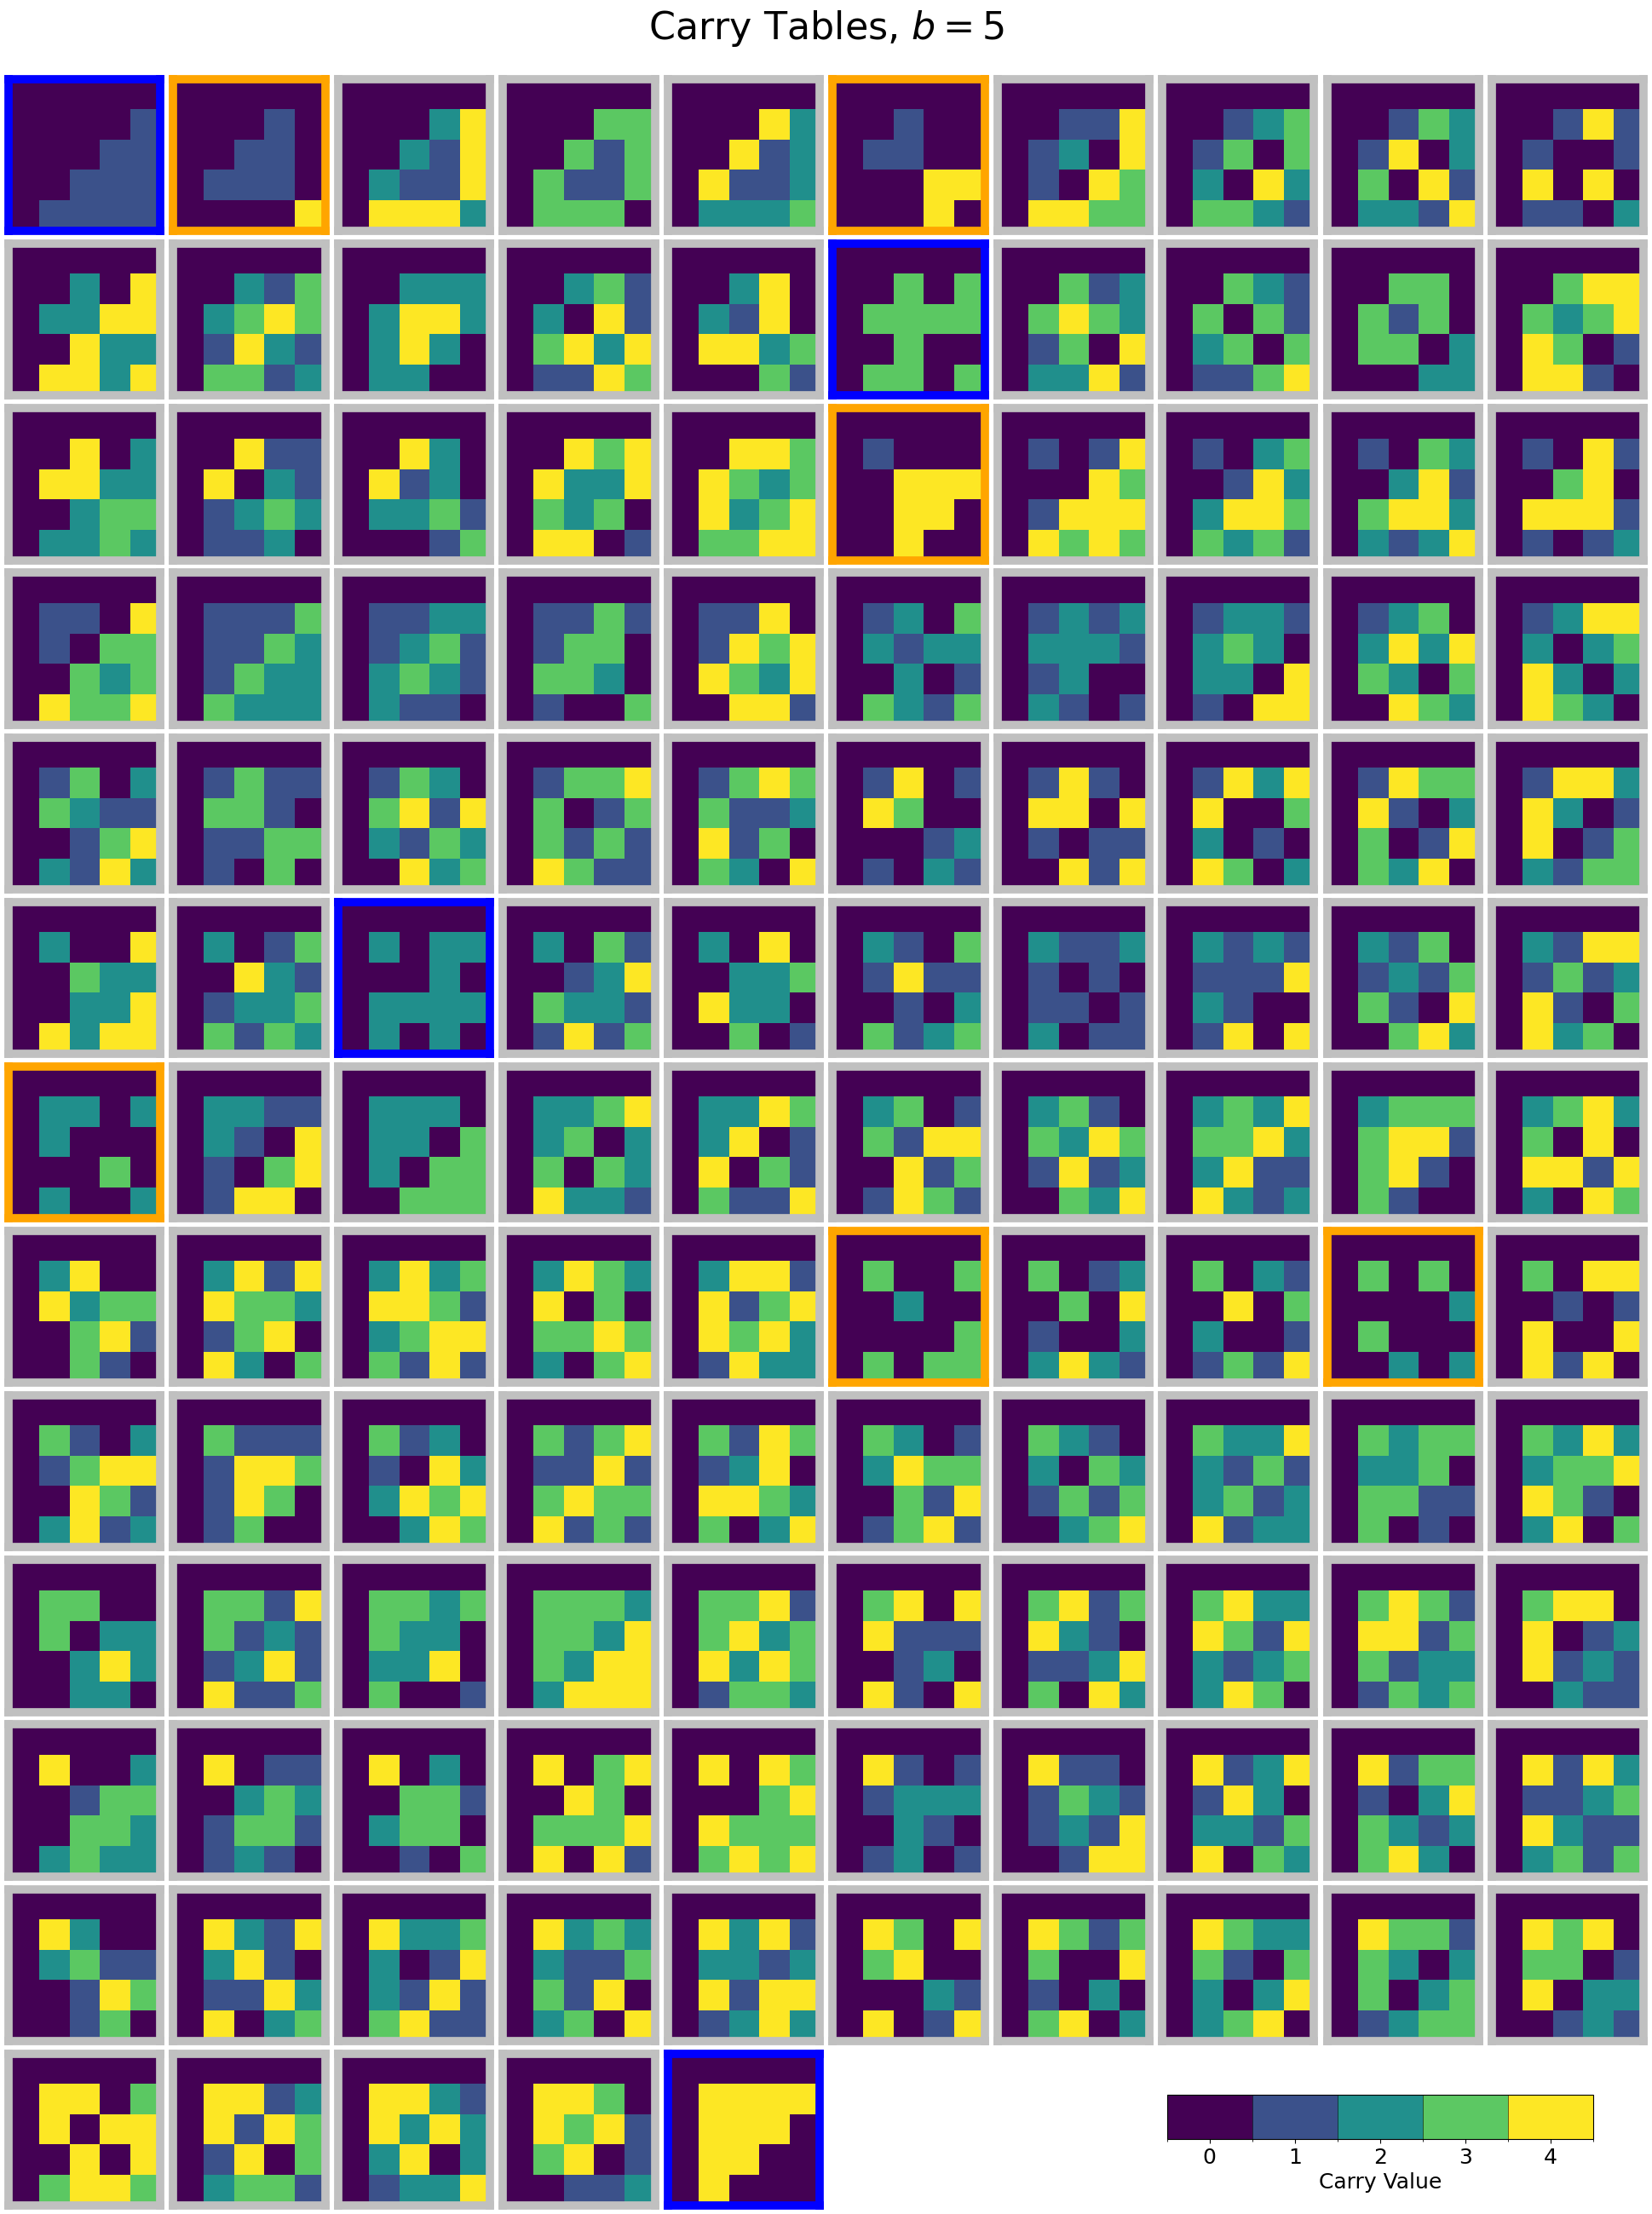

In [22]:
fig, axes = plt.subplots(13, 10, figsize=(2*10, 2*13))
fig.suptitle('Carry Tables, $b = 5$', fontsize=32, y=0.992)
axes = axes.flatten()

# sort table_dict
all_tables[b] = {dc: all_tables[b][dc] for dc in sorted(all_tables[b].keys())}

# iterate through table_dict
i = 0
for dc, table in all_tables[b].items():

    # classify as standard, alt. unit, or other carry
    est_dim = est_dim_box_vs_depth[b][dc][3]
    if len(np.unique(all_tables[b][dc])) == 2:
        color = 'blue'
    elif est_dim > 1.25 and est_dim < 1.5:
        color = 'orange'
    else:
        color = 'silver'

    # display image, increment i
    ax = axes[i]
    utils.add_border(ax, color=color, width=7)
    levels = np.linspace(-0.5, b-0.5, b+1)
    norm = BoundaryNorm(levels, ncolors=256)
    im = ax.imshow(table, cmap='viridis', norm=norm)
    i += 1

# turn off axis ticks and labels
for j, ax in enumerate(axes):
    ax.tick_params(axis='both', which='both', length=0)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    if j >= i:
        ax.axis('off')


# add colorbar
plt.tight_layout()
fig.subplots_adjust(bottom=0, top=0.96, left=0.02, right=0.98)
cbar_ax = fig.add_axes([0.7, 0.03, 0.25, 0.02])
cbar = fig.colorbar(im, cax=cbar_ax, boundaries=levels, drawedges=True, orientation='horizontal')
cbar.set_ticks(range(b))
cbar.ax.tick_params(labelsize=18)
cbar.set_label('Carry Value', fontsize=18)

plt.savefig(f'../figures/tables5_d1.png', dpi=300)

## Investigate extent of associativity

In [19]:
from base import BaseElt

In [20]:
from itertools import product, combinations

In [21]:
# initialize overall dictionary
all_associativity = {}

# iterate through bases
for b in range(3, 6):

    # initialize dictionary
    associativity = {}
    depth = 4

    # iterate through tables
    for dc, table in all_tables[b].items():
        tuples = list(product(*[range(b)]*depth))
        if depth > 3:
            tuples = random.sample(tuples, b**3)
        num_assoc = 0
        triplets = list(combinations(tuples, 3))
        for (n, m, p) in triplets:
    
            # convert to group elements
            n = BaseElt(n, table)
            m = BaseElt(m, table)
            p = BaseElt(p, table)
    
            # check associativity
            s1 = (n + m) + p
            s2 = n + (m + p)
            is_assoc = s1.vals == s2.vals
            if is_assoc:
                num_assoc += 1
    
        # add fraction of associativity to dictionary
        associativity[dc] = num_assoc / len(triplets)

    # add to overall dictionary
    all_associativity[b] = associativity

In [22]:
with open(f'../pickles/complexity_measures/associativity_d{depth}.pickle', 'wb') as f:
    pickle.dump(all_associativity, f)